## 1) Predict the housing price with Linear Regression

## A. Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('D:\VN_housing_dataset.csv')
df


,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82492,82492.0,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,82493.0,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,82494.0,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"
82495,82495.0,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,NaN,NaN,"102,22 triệu/m²"


## B. Data Preparation

In [2]:
# xóa bỏ các giá trị null
df.dropna()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
15,15.0,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52 m²,12 m,4.2 m,"93,27 triệu/m²"
24,24.0,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
29,29.0,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32 m²,6.6 m,4.5 m,"60,94 triệu/m²"
34,34.0,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42 m²,11 m,4 m,"29,76 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82355,82355.0,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37 m²,13 m,3 m,"43,24 triệu/m²"
82356,82356.0,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100 m²,16 m,6 m,115 triệu/m²
82359,82359.0,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80 m²,14 m,5 m,"262,5 triệu/m²"
82361,82361.0,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89 m²,20 m,4 m,"258,43 triệu/m²"


In [3]:
df = df.rename(columns={'Quận': 'district'})
df = df.rename(columns={'Diện tích': 'area'})
df = df.rename(columns={'Giá/m2': 'price_per_area'})

In [4]:
# giá nhà và diện tích các nhà thuộc quận Hoàng Mai
df1=df[df["district"]=="Quận Hoàng Mai"][["area","price_per_area"]]
df1


,area,price_per_area
11,30 m²,"83,33 triệu/m²"
22,45 m²,"64,44 triệu/m²"
44,33 m²,"80,3 triệu/m²"
46,32 m²,"96,88 triệu/m²"
63,77 m²,"2,08 triệu/m²"
...,...,...
82424,56 m²,"80,36 triệu/m²"
82459,32 m²,"90,63 triệu/m²"
82466,33 m²,"87,88 triệu/m²"
82470,45 m²,"96,67 triệu/m²"


In [5]:
# lọc các kí tự khỏi các cột của data
df1["price_per_area"] = df1["price_per_area"].apply(lambda x: str(x) if isinstance(x, float) else x)
df1['area'] = df1['area'].apply(lambda x: str(x) if isinstance(x, float) else x)
df1['area'] = df1['area'].apply(lambda x: x.split('m²')[0])
df1["price_per_area"]=df1["price_per_area"].apply(lambda x: x.split('triệu/m²')[0])
df1["price_per_area"]=df1["price_per_area"].apply(lambda x: x.split('đ/m²')[0])
df1["price_per_area"]=df1["price_per_area"].apply(lambda x: x.split('tỷ/m²')[0])
df1






,area,price_per_area
11,30,"83,33"
22,45,"64,44"
44,33,"80,3"
46,32,"96,88"
63,77,"2,08"
...,...,...
82424,56,"80,36"
82459,32,"90,63"
82466,33,"87,88"
82470,45,"96,67"


In [6]:
# chuyển str sang float
df1["area"]=df1["area"].astype(float)
df1["price_per_area"] = df1["price_per_area"].replace(',', '.', regex=True).astype(float)


In [7]:
df1["price"]=(df1["area"]*df1["price_per_area"])/1000
df2=df1[["area","price"]]
df2


,area,price
11,30.0,2.49990
22,45.0,2.89980
44,33.0,2.64990
46,32.0,3.10016
63,77.0,0.16016
...,...,...
82424,56.0,4.50016
82459,32.0,2.90016
82466,33.0,2.90004
82470,45.0,4.35015


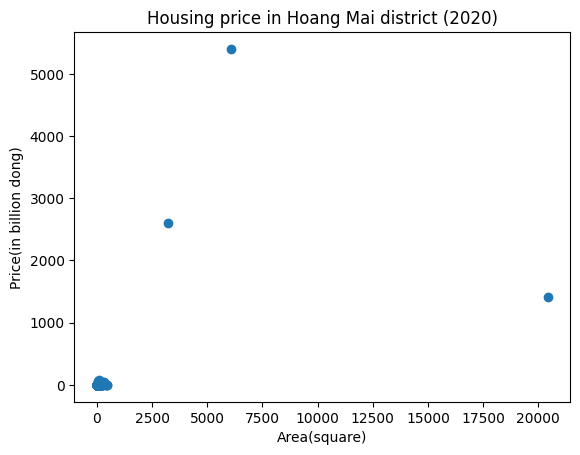

In [8]:
plt.scatter(df2["area"],df2["price"])
plt.xlabel("Area(square)")
plt.ylabel("Price(in billion dong)")
plt.title("Housing price in Hoang Mai district (2020)")
plt.show()

Biểu đồ phân tán thể hiện mối quan hệ giữa diện tích các ngôi nhà và giá tương ứng của chúng tại quận Hoàng Mai năm 2020. Mỗi điểm trên biểu đồ đại diện cho một ngôi nhà trong tập dữ liệu.

Từ biểu đồ có thể thấy giữa diện tích và giá nhà có mối tương quan thuận, nghĩa là diện tích nhà tăng thì giá cũng có xu hướng tăng theo. Tuy nhiên, chúng ta cũng có thể thấy rằng có rất nhiều thay đổi về giá đối với một diện tích nhất định, điều này cho thấy rằng các yếu tố khác, chẳng hạn như vị trí, tình trạng và tiện nghi, cũng có thể đóng một vai trò trong việc xác định giá của một ngôi nhà.

Nhìn chung, biểu đồ này có thể cung cấp những hiểu biết hữu ích cho những người quan tâm đến việc mua hoặc bán nhà ở quận Hoàng Mai, vì nó có thể giúp họ hiểu được mối quan hệ giữa diện tích và giá cả cũng như các yếu tố khác có thể ảnh hưởng đến giá nhà ở như thế nào.

Nhưng ở thời điểm hiện tại, dữ liệu không được phân bố một cách đồng đều, điều đó có nghĩa là dữ liệu của chúng ta chưa thực sự hợp lí

In [9]:
# tong quan ve data df2
df2.describe()

,area,price
count,11164.000000,11163.000000
mean,46.208477,4.529354
std,204.582994,58.313926
min,3.000000,0.033333
25%,33.000000,2.500035
50%,40.000000,3.000000
75%,48.000000,3.800100
max,20430.000000,5399.999340


In [10]:
# loai bo outlier
Q1 = df2["area"].quantile(0.25)
Q3 = df2["area"].quantile(0.75)
IQR = Q3 - Q1
Q12 = df2["price"].quantile(0.25)
Q32 = df2["price"].quantile(0.75)
IQR2 = Q32 - Q12

df3 = df2[(df2["area"] >= Q1 - 1.5*IQR) & (df2["area"] <= Q3 + 1.5*IQR) & (df2["price"] >= Q12 - 1.5*IQR2) & (df2["price"] <= Q32 + 1.5*IQR2)]
df3

,area,price
11,30.0,2.49990
22,45.0,2.89980
44,33.0,2.64990
46,32.0,3.10016
65,27.0,1.94994
...,...,...
82424,56.0,4.50016
82459,32.0,2.90016
82466,33.0,2.90004
82470,45.0,4.35015


In [11]:
# tong quan ve data df3
df3.describe()

,area,price
count,9988.000000,9988.000000
mean,39.356194,3.045198
std,9.523513,0.917148
min,12.000000,0.549940
25%,32.000000,2.498118
50%,38.000000,2.900060
75%,45.000000,3.500170
max,70.000000,5.750010


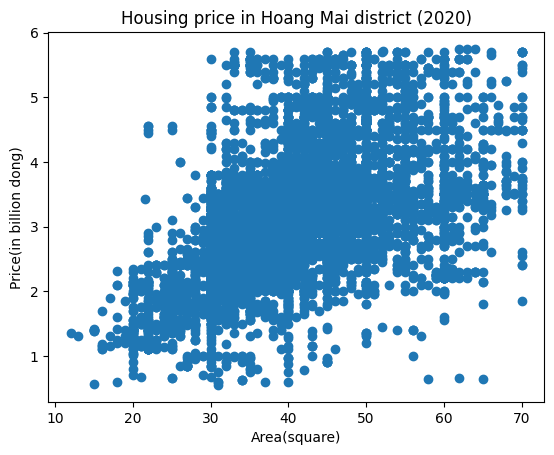

In [12]:
# scatter plot sau khi loai bo outlier
plt.scatter(df3["area"],df3["price"])
plt.xlabel("Area(square)")
plt.ylabel("Price(in billion dong)")
plt.title("Housing price in Hoang Mai district (2020)")
plt.show()

Bên trên là biểu đồ phân bố dữ liệu sau khi đã xử lí, ta có thể thấy dữ liệu được phân bổ một cách đồng đều, thể hiện rõ sự phụ thuộc của giá nhà đến diệc tích căn nhà.

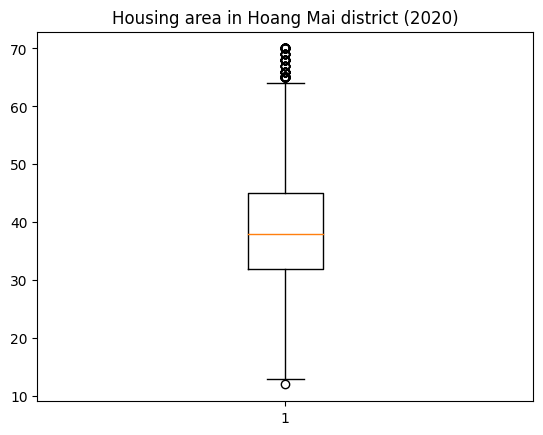

In [13]:
plt.boxplot(df3["area"])
plt.title("Housing area in Hoang Mai district (2020)")
plt.show()

Biểu đồ hình hộp của các khu vực nhà ở tại quận Hoàng Mai cho thấy sự phân bố của dữ liệu và giúp xác định bất kỳ điểm ngoại lệ nào. Biểu đồ hiển thị một hộp biểu thị phạm vi liên vùng (IQR) của dữ liệu, với một dòng bên trong hộp biểu thị giá trị trung bình. Râu kéo dài từ hộp đại diện cho phạm vi dữ liệu, không bao gồm bất kỳ ngoại lệ nào.

Từ lô đất, chúng ta có thể thấy rằng diện tích nhà ở trung bình là khoảng 40 mét vuông, với giá trị tối thiểu khoảng 12 mét vuông và giá trị tối đa khoảng 70 mét vuông. Biểu đồ cũng cho thấy một số điểm ngoại lệ phía trên râu trên, cho thấy rằng có một số khu vực nhà ở lớn hơn trong quận cao hơn đáng kể so với giá trị trung bình.

Nhìn chung, đồ thị cho thấy sự phân bổ các khu vực nhà ở tại quận Hoàng Mai là tương đối rộng.

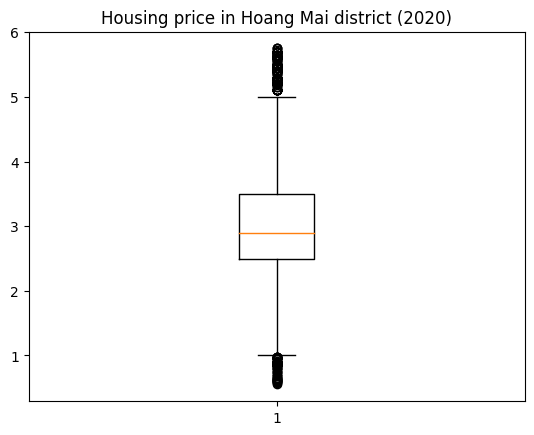

In [14]:
plt.boxplot(df3["price"])
plt.title("Housing price in Hoang Mai district (2020)")
plt.show()

Trong biểu đồ này, có thể thấy giá nhà trung bình tại quận Hoàng Mai năm 2020 vào khoảng 2,9 tỷ đồng. Nhóm dưới (Q1) quanh mức 2,4 tỷ đồng và nhóm trên (Q3) quanh mức 3,5 tỷ đồng. Biểu đồ còn cho thấy có những ngôi nhà đắt tiền (ngoại lai) có giá lên tới trên dưới 5,7 tỷ đồng.

## C. Linear Regression Approach

$$\bar x = \dfrac{\sum_{i = 1}^nx_i}{n}$$

In [15]:
X=df3["area"]
X_mean=X.mean()
X_mean


39.356194433319985

$$\bar y = \dfrac{\sum_{i = 1}^ny_i}{n}$$

In [16]:
Y=df3["price"]
Y_mean=Y.mean()
Y_mean

3.0451978006107328

$$\sum_{i = 1}^nx_i^2$$

In [17]:
sum_x_square=sum([x**2 for x in X])
sum_x_square

16376307.4989

$$\sum_{i = 1}^ny_i^2$$

In [18]:
sum_y_square=sum([x**2 for x in Y])
sum_y_square

101021.68375411136

$$\sum_{i = 1}^nx_iy_i$$

In [19]:
sum_xy = sum(x * y for x, y in zip(X, Y))
sum_xy


1244686.751612446

$$S_{xx} = \sum_{i = 1}^nx_i^2 - \dfrac{(\sum_{i = 1}^nx_i)^2}{n}$$

In [20]:
Sxx = sum_x_square - ((sum(X))**2)/len(X)
Sxx

905794.0166504104

$$S_{xy} = \sum_{i = 1}^nx_iy_i - \dfrac{(\sum_{i = 1}^nx_i)(\sum_{i = 1}^ny_i)}{n}$$

In [21]:
Sxy=sum_xy-((sum(X)*sum(Y))/len(X))
Sxy

47650.95308565558

$$\hat \beta_0 = \bar y - \hat \beta_1\bar x$$

$$\hat{\beta}1 = \frac{S{xy}}{S_{xx}}$$

In [22]:
beta_1_hat=Sxy/Sxx
beta_1_hat

0.05260683136533279

$$\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}$$

In [23]:
beta_0_hat=Y_mean-beta_1_hat*X_mean
beta_0_hat

0.9747931168758193

$$\hat y = \hat \beta_0 + \hat \beta_1x$$

In [24]:
y_hat=beta_0_hat+beta_1_hat*X
y_hat

11       2.552998
22       3.342101
44       2.710819
46       2.658212
65       2.395178
           ...   
82424    3.920776
82459    2.658212
82466    2.710819
82470    3.342101
82473    2.710819
Name: area, Length: 9988, dtype: float64

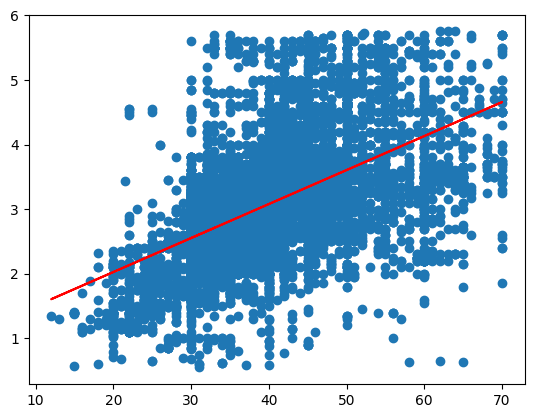

In [25]:
plt.scatter(X,Y)
plt.plot(X,y_hat,color="red")
plt.show()

Các biến X và Y đại diện cho các biến độc lập và biến phụ thuộc trong phân tích hồi quy tuyến tính. Biến y_hat là giá trị dự đoán của Y dựa trên mô hình hồi quy tuyến tính phù hợp với dữ liệu.

## D. Using Model LinearRegression

In [26]:

from sklearn.linear_model import LinearRegression

X = df3[["area"]]
Y = df3[["price"]]
model = LinearRegression()
model.fit(X,Y)
y_row=model.predict(X)



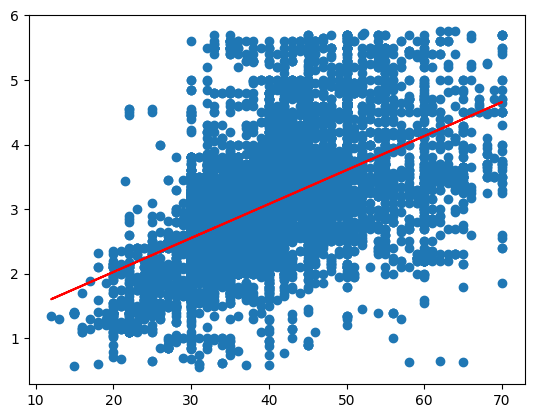

In [27]:
plt.scatter(X,Y)
plt.plot(X,y_row,color="red")
plt.show()


Các biến X và Y đại diện cho các biến độc lập và biến phụ thuộc trong phân tích hồi quy tuyến tính. Biến y_hat là giá trị dự đoán của Y dựa trên mô hình hồi quy tuyến tính phù hợp với dữ liệu.

## Predict the value of price based on area


In [28]:
area=pd.DataFrame(df3["area"])
price=pd.DataFrame(df3["price"])
model1=LinearRegression()
model1.fit(area,price)
area_new=[[int(input("Enter the value of the area: "))]]
price_predict = float(model1.predict(area_new))
print("Predicted price: ",price_predict)
    


Predicted price:  3.079066371489124


c:\Users\admin\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2) Multiple Linear Regression


In [29]:
df = df.rename(columns={'Số phòng ngủ': 'number_of_bedroom'})


In [30]:

df4=df[df["district"]=="Quận Hoàng Mai"][df["number_of_bedroom"] !="NaN"][["area","price_per_area","number_of_bedroom"]].dropna()
df4


C:\Users\admin\AppData\Local\Temp\ipykernel_9848\581257860.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4=df[df["district"]=="Quận Hoàng Mai"][df["number_of_bedroom"] !="NaN"][["area","price_per_area","number_of_bedroom"]].dropna()


,area,price_per_area,number_of_bedroom
11,30 m²,"83,33 triệu/m²",4 phòng
22,45 m²,"64,44 triệu/m²",4 phòng
44,33 m²,"80,3 triệu/m²",3 phòng
46,32 m²,"96,88 triệu/m²",3 phòng
63,77 m²,"2,08 triệu/m²",9 phòng
...,...,...,...
82424,56 m²,"80,36 triệu/m²",4 phòng
82459,32 m²,"90,63 triệu/m²",2 phòng
82466,33 m²,"87,88 triệu/m²",4 phòng
82470,45 m²,"96,67 triệu/m²",6 phòng


In [31]:
df4["price_per_area"] = df4["price_per_area"].apply(lambda x: str(x) if isinstance(x, float) else x)
df4['area'] = df4['area'].apply(lambda x: str(x) if isinstance(x, float) else x)
df4["number_of_bedroom"]=df4["number_of_bedroom"].apply(lambda x: str(x) if isinstance(x, float) else x)
df4['area'] = df4['area'].apply(lambda x: x.split('m²')[0])
df4["price_per_area"]=df4["price_per_area"].apply(lambda x: x.split('triệu/m²')[0])
df4["price_per_area"]=df4["price_per_area"].apply(lambda x: x.split('đ/m²')[0])
df4["price_per_area"]=df4["price_per_area"].apply(lambda x: x.split('tỷ/m²')[0])
df4["number_of_bedroom"]=df4["number_of_bedroom"].apply(lambda x: x.split('phòng')[0])
df4["number_of_bedroom"]=df4["number_of_bedroom"].apply(lambda x: x.split('nhiều hơn 10 ')[0])
df4

,area,price_per_area,number_of_bedroom
11,30,"83,33",4
22,45,"64,44",4
44,33,"80,3",3
46,32,"96,88",3
63,77,"2,08",9
...,...,...,...
82424,56,"80,36",4
82459,32,"90,63",2
82466,33,"87,88",4
82470,45,"96,67",6


In [32]:

df4["area"]=df4["area"].astype(float)
df4["price_per_area"] = df4["price_per_area"].replace(',', '.', regex=True).astype(float)
df4["number_of_bedroom"] = pd.to_numeric(df4["number_of_bedroom"])
df5=df4.dropna()
df5["number_of_bedroom"]=df5["number_of_bedroom"].astype(float)
df5

C:\Users\admin\AppData\Local\Temp\ipykernel_9848\3565893221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["number_of_bedroom"]=df5["number_of_bedroom"].astype(float)


,area,price_per_area,number_of_bedroom
11,30.0,83.33,4.0
22,45.0,64.44,4.0
44,33.0,80.30,3.0
46,32.0,96.88,3.0
63,77.0,2.08,9.0
...,...,...,...
82424,56.0,80.36,4.0
82459,32.0,90.63,2.0
82466,33.0,87.88,4.0
82470,45.0,96.67,6.0


In [33]:
df5["price"]=(df5["area"]*df5["price_per_area"])/1000
df6=df5[["area","number_of_bedroom","price"]]
df6



C:\Users\admin\AppData\Local\Temp\ipykernel_9848\1236564373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["price"]=(df5["area"]*df5["price_per_area"])/1000


,area,number_of_bedroom,price
11,30.0,4.0,2.49990
22,45.0,4.0,2.89980
44,33.0,3.0,2.64990
46,32.0,3.0,3.10016
63,77.0,9.0,0.16016
...,...,...,...
82424,56.0,4.0,4.50016
82459,32.0,2.0,2.90016
82466,33.0,4.0,2.90004
82470,45.0,6.0,4.35015


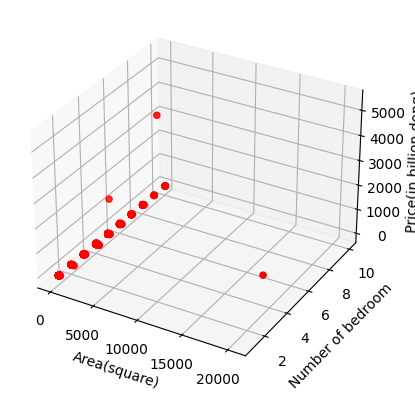

In [34]:
x = df6["area"]
y = df6["number_of_bedroom"]
z = df6["price"]

# Create a scatter plot using the x, y, and z columns
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Area(square)')
ax.set_ylabel('Number of bedroom')
ax.set_zlabel('Price(in billion dong)')
plt.show()

Biểu đồ 3D thể hiện mối quan hệ giữa diện tích nhà ở, số phòng ngủ và giá trong bộ dữ liệu đã cho. Trục x thể hiện diện tích căn nhà tính bằng mét vuông, trục y thể hiện số phòng ngủ trong căn nhà và trục z thể hiện giá căn nhà tính bằng tỷ đồng. Mỗi điểm trên biểu đồ đại diện cho một ngôi nhà duy nhất.

Từ biểu đồ, chúng ta có thể thấy rằng khi diện tích của ngôi nhà và số lượng phòng ngủ tăng lên, giá của ngôi nhà cũng có xu hướng tăng theo. Điều này được mong đợi vì những ngôi nhà lớn hơn với nhiều phòng ngủ hơn thường đắt hơn những ngôi nhà nhỏ hơn với ít phòng ngủ hơn.

Chúng ta cũng có thể quan sát thấy rằng có một số ngôi nhà có số lượng phòng ngủ cao tương đối rẻ so với những ngôi nhà khác có số lượng phòng ngủ tương tự. Điều này có thể là do các yếu tố ngoại lai mà chúng ta không bàn đến.


In [35]:
df6["area"].describe()

count    11116.000000
mean        46.051497
std        204.980886
min          3.000000
25%         33.000000
50%         40.000000
75%         48.000000
max      20430.000000
Name: area, dtype: float64

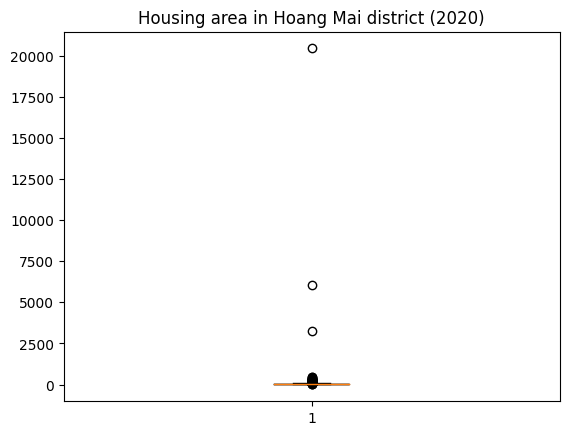

In [36]:
plt.boxplot(df6["area"])
plt.title("Housing area in Hoang Mai district (2020)")
plt.show()

Nhìn vào biểu đồ, chúng ta có thể thấy rằng diện tích nhà ở trung bình là khoảng 46 mét vuông, với IQR dao động từ khoảng 33 đến 48 mét vuông. Có một vài ngoại lệ ở 2 đầu phân phối, cho thấy rằng có một số ngôi nhà lớn hơn hoặc nhỏ hơn trong khu vực.

In [37]:
df6["number_of_bedroom"].describe()

count    11116.000000
mean         3.683879
std          1.202006
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         10.000000
Name: number_of_bedroom, dtype: float64

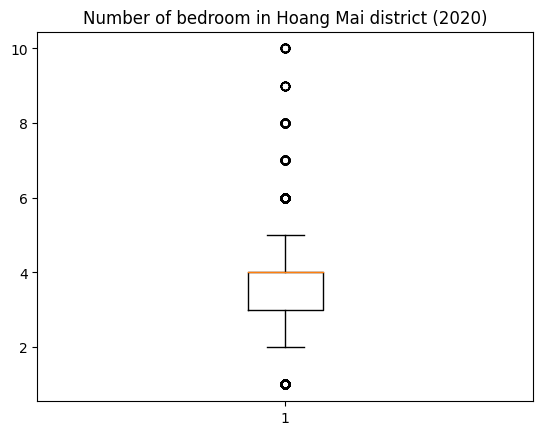

In [38]:
plt.boxplot(df6["number_of_bedroom"])
plt.title("Number of bedroom in Hoang Mai district (2020)")
plt.show()

Từ biểu đồ, chúng ta có thể thấy rằng phần lớn các ngôi nhà có 2 hoặc 3 phòng ngủ, trung bình là 3 phòng ngủ. Có nhà chỉ có 1 phòng ngủ, có nhà 4 phòng ngủ trở lên. Dữ liệu dường như được phân phối tương đối đối xứng, tuy nhiên vẫn còn một số ngoại lệ như một vài căn nhà có tới 10 phòng ngủ.

In [39]:
df6["price"].describe()

count    11116.000000
mean         4.509332
std         58.434474
min          0.033333
25%          2.500020
50%          3.000000
75%          3.800000
max       5399.999340
Name: price, dtype: float64

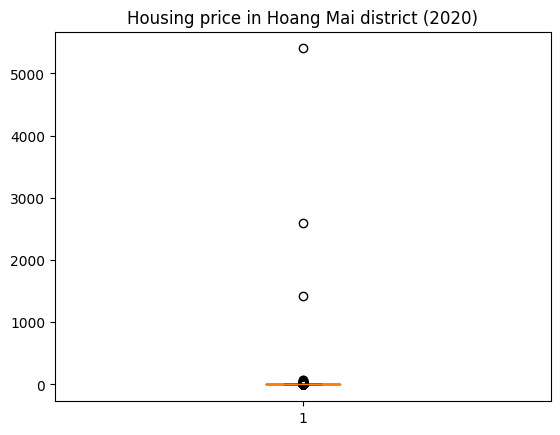

In [40]:
plt.boxplot(df6["price"])
plt.title("Housing price in Hoang Mai district (2020)")
plt.show()

Qua biểu đồ có thể thấy, giá nhà trung bình tại quận Hoàng Mai dao động quanh mức 4,5 tỷ đồng. IQR nằm trong khoảng từ 2,5 tỷ đồng đến 3,8 tỷ đồng, cho thấy hầu hết giá nhà đất đều nằm trong khoảng này. Tuy nhiên, cũng có một số căn biệt lập trên 5000 tỷ đồng, các phần tử này được coi là phần tử ngoại lai.

In [41]:
# loai bo outlier
Q1 = df6["area"].quantile(0.25)
Q3 = df6["area"].quantile(0.75)
IQR = Q3 - Q1
Q1_2 = df6["price"].quantile(0.25)
Q3_2 = df6["price"].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
Q1_3 = df6["number_of_bedroom"].quantile(0.25)
Q3_3 = df6["number_of_bedroom"].quantile(0.75)
IQR_3 = Q3_3 - Q1_3

df7 = df6[(df6["area"] >= Q1 - 1.5*IQR) & (df6["area"] <= Q3 + 1.5*IQR) & (df6["price"] >= Q1_2 - 1.5*IQR_2) & (df6["price"] <= Q3_2 + 1.5*IQR_2) & (df6["number_of_bedroom"] >= Q1_3 - 1.5*IQR_3) & (df6["number_of_bedroom"] <= Q3_3 + 1.5*IQR_3)]
df7

,area,number_of_bedroom,price
11,30.0,4.0,2.49990
22,45.0,4.0,2.89980
44,33.0,3.0,2.64990
46,32.0,3.0,3.10016
65,27.0,3.0,1.94994
...,...,...,...
82415,45.0,3.0,3.24990
82424,56.0,4.0,4.50016
82459,32.0,2.0,2.90016
82466,33.0,4.0,2.90004


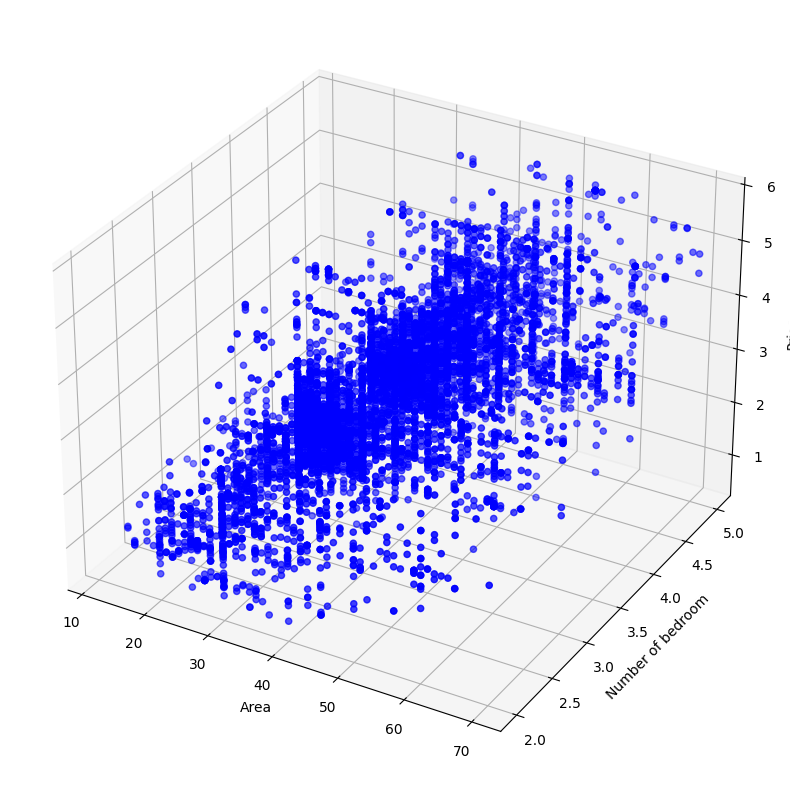

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = df7["area"]
y = df7["number_of_bedroom"]
z = df7["price"]

ax.scatter3D(x, y, z, c='b', marker='o')

ax.set_xlabel('Area')
ax.set_ylabel('Number of bedroom')
ax.set_zlabel('Price')
plt.show()

### Matrix approach

In [43]:
X1=df7["area"]
X2=df7["number_of_bedroom"]


$$\textbf{y} = \textbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

$$\textit{L}  = \sum_{i=1}^{n} \epsilon_i^2 = \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{k} \beta_j x_{ij})^2$$

 $$\boldsymbol{\hat \beta} = (\boldsymbol{X}^T\boldsymbol{X})⁻¹\boldsymbol{X}^T\textbf{y}$$

In [44]:
Y=df7["price"]

In [45]:
X = np.concatenate((np.ones((df7.shape[0], 1)), df7[['area', 'number_of_bedroom']].values), axis=1)
X

array([[ 1., 30.,  4.],
       [ 1., 45.,  4.],
       [ 1., 33.,  3.],
       ...,
       [ 1., 32.,  2.],
       [ 1., 33.,  4.],
       [ 1., 33.,  3.]])

In [46]:
Y=df7["price"].values.reshape(-1,1)
B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
B_hat

array([[0.38419511],
       [0.04484428],
       [0.25429001]])

$$\textbf{ŷ} = \textbf{X}\boldsymbol{\hat \beta}$$

In [47]:
y_hat = np.dot(X, B_hat)


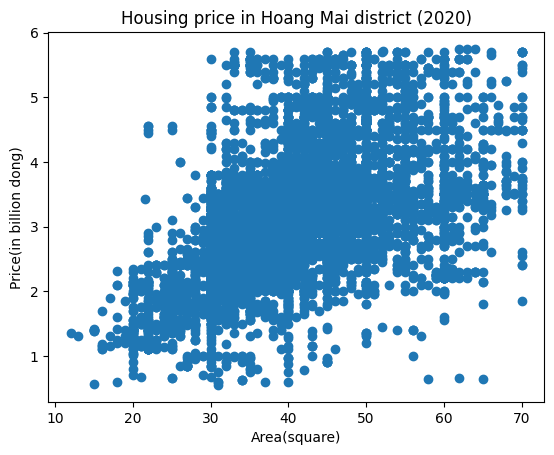

In [48]:
# scatter plot sau khi loai bo outlier
plt.scatter(df3["area"],df3["price"])
plt.xlabel("Area(square)")
plt.ylabel("Price(in billion dong)")
plt.title("Housing price in Hoang Mai district (2020)")
plt.show()

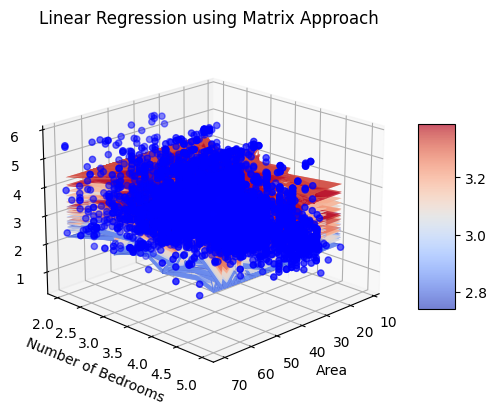

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df7["area"], df7["number_of_bedroom"], df7["price"], c='blue', marker='o')

# plot plane
surf = ax.plot_surface(X1, X2, y_hat, cmap='coolwarm', alpha=0.7)

# add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# set labels and title
ax.set_xlabel('Area')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Linear Regression using Matrix Approach')

# adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.show()


Đây là biểu đồ 3D với mặt phẳng biểu thị mô hình hồi quy tuyến tính phù hợp với dữ liệu. Trục x biểu thị diện tích nhà ở, trục y biểu thị số phòng ngủ và trục z biểu thị giá nhà.

Mặt phẳng màu đỏ biểu thị mô hình hồi quy tuyến tính phù hợp với dữ liệu bằng cách sử dụng phương pháp ma trận. Mặt phẳng biểu thị các giá trị dự đoán của giá nhà dựa trên diện tích và số phòng ngủ. Phương trình của mặt phẳng được ước tính bằng các hệ số B_hat, được lấy từ phương trình ma trận:

Y_hat = X * B_hat

trong đó Y_hat là giá trị dự đoán của giá nhà ở, X là ma trận thiết kế chứa diện tích và số phòng ngủ, và B_hat là vectơ hệ số thu được từ ước tính bình phương nhỏ nhất.

In [51]:
a = df7[['area',"number_of_bedroom"]]
b = df7['price']

# Create a Linear Regression model and fit it to the data
model= LinearRegression()
model.fit(a, b)
c=int(input("Input area: "))
d=int(input("Input number of bedroom"))
# Make a prediction for a new input
new_input = [[c, d]]
predicted_price = model.predict(new_input)
print("Predicted price:", predicted_price[0])

Predicted price: 2.9408361835913817


c:\Users\admin\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
